## Chapter 5: Transfer Learning for Image Classification
- Transfer learning is a technique where we transfer the leearning of the model on a generic dataset to the specific dataset of interest.  
- Pre-trained models are used to perform transfer learning and are trained on millions of images (based on generic dataset) and those pre-trained models are fine tuned to our dataset of interest
- there are two fundamental familes for transfer learning, VGG architecture and ResNet Architecture.  
- We will apply the two architectures to age and gender classification where we will learn about optimizing over both cross-entropy and using leveraging neural networks to generate multiple (136 instead of 1 prediction) continuous outputs in a single prediction

## Introduction to Transfer Learning
- knowledge gained from one task is used to solve similar task
- example, a model trained on millions of images that spans thousands of classes of objects (not just cats and dogs).   The various filters (kernels) of the model would activate  for a wide variety of shapes, colors and textures within the images.  
- These filters can be reused to learn features on a new set of images.  Post learning the features, they can be connected to a hidden layer prior to the final classification layer for customing on the new data
- ImageNet is a competition hosted to classify approximiately 14 million images into 1000 differentn classes.  It has a variety of classes in its dataset like Indian Elephant, lionfish, hard disk, hair spray etc
- The Deep Neural Network architectures we will go through in this chapter have been trained on the ImageNet dataset.  The Model is very deep in order to capture as much information as possible(in order to capture variety and the volume of objects that are to be classified by ImageNet, )

## Example of Transfer Learning
- Suppose we have images of a road, trying to classify them in terms of objects they contain.  
- Building a model from scratch might result in sub-optimal results as number of images could be insufficient to learn various variations within the dataset
- A pre-trained model trained on ImageNet comes in handy in such a scenario.  
- The model would have already learned a lot about traffic related classes like cars, roads, trees, humans during training on the large ImageNet dataset
- Hence leveraging the already trained model would result in faster and more accurate training as the model already knows the generic shapes and now has to fit them for specific images.  

## Steps in Transfer Learning
1. Normalize input images with the same mean and standard deviation that was used during the training process of pre-trained model
2. Fetch the pre-trained model's architecture.  Fetch the weights for this architecture that represents the estimate for its historical training process on large images
3. Discard the last few layers of the pre-trained model
4. Connect truncated pre-trained model to a freshly initialized layer where weights are randomly initialized.  Ensure the output of the last layer has as many neurons as the classes/outputs we would want to predict.  
5. Ensure the weights of the pre-trained model is not trainable (they should be frozen during back prop), but that the weights of newly initialized layer and the weights connecting it to the output layer are trainable
6. Update trainable parameters over increasing epochs to fit a model

Summary: We only learn the weights of the lower layers and not the weights of the pre-trained model as we leverage those weights to predict on new smaller dataset

## VGG16 (Visual Geometry Group) Architecture
- based out of University of Oxford
- 16 stands for number of layers in the model
- model is trained to classify objects in the ImageNet Competition and stood as as the runner up architecture in 2014.  
- We can also use GoogleNet for transfer learning


In [1]:
import torchvision
import torch.nn as nn
import torch
import torch.nn.functional as F

from torchsummary import summary
from torchvision import transforms, models, datasets

device = 'mps'

model = models.vgg16(pretrained=True).to(device)

/Users/rajmani/Documents/research/Home/python/computer-vision/py_env/lib/python3.11/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/Users/rajmani/Documents/research/Home/python/computer-vision/py_env/lib/python3.11/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /Users/rajmani/.cache/torch/hub/checkpoints/vgg16-397923af.pth
100%|██████████| 528M/528M [00:14<00:00, 38.2MB/s] 


In [3]:
summary(model, torch.zeros(1, 3, 224, 224));

Layer (type:depth-idx)                   Output Shape              Param #
├─Sequential: 1-1                        [-1, 512, 7, 7]           --
|    └─Conv2d: 2-1                       [-1, 64, 224, 224]        1,792
|    └─ReLU: 2-2                         [-1, 64, 224, 224]        --
|    └─Conv2d: 2-3                       [-1, 64, 224, 224]        36,928
|    └─ReLU: 2-4                         [-1, 64, 224, 224]        --
|    └─MaxPool2d: 2-5                    [-1, 64, 112, 112]        --
|    └─Conv2d: 2-6                       [-1, 128, 112, 112]       73,856
|    └─ReLU: 2-7                         [-1, 128, 112, 112]       --
|    └─Conv2d: 2-8                       [-1, 128, 112, 112]       147,584
|    └─ReLU: 2-9                         [-1, 128, 112, 112]       --
|    └─MaxPool2d: 2-10                   [-1, 128, 56, 56]         --
|    └─Conv2d: 2-11                      [-1, 256, 56, 56]         295,168
|    └─ReLU: 2-12                        [-1, 256, 56, 56]      

In [4]:
model

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

- Note that there are 3 submodules in the model: features, avgpol and classifier.  
- We would need to freeze the features and avgpool modules.  Delete the classifier module and create a new one in its place that will predict the required number of classes corresponding to our dataset (instead of existing 1000 classes)
- lets see how the VG16 model is used in practice using the cats and dogs dataset which contains 500 imaegs in each class for training

In [19]:
from PIL import Image
from torchvision.transforms import transforms
from torch.utils.data import DataLoader, Dataset
import cv2, glob, numpy as np, pandas as pd
import random

img_height, img_width = 224, 224

transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Resize((img_height, img_width)),
     transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])]
)

class CatsDogs(Dataset):
    def __init__(self, folder, transform=None):
        cats = glob.glob(folder + "/cats/*.jpg")
        dogs = glob.glob(folder + "/dogs/*.jpg")
        self.file_list = cats[:500] + dogs[:500]
        random.shuffle(self.file_list)
        self.labels = [path.split("/")[-1].startswith("dog") for path in self.file_list]
        self.transform = transform

    def __len__(self):
        return len(self.file_list)

    def __getitem__(self, idx):
        img = Image.open(self.file_list[idx])
        if self.transform is not None:
            img = self.transform(img)
        label = self.labels[idx]
        return img.to("mps"), torch.tensor([label], dtype=torch.float32).to("mps")

- when leveraging pretrained models, its important to resize, permute and normalize images (as appropriate for that pretrained model)
where images are first scaled to a value between 0 and 1 across the 3 channels and then normalized to a mean of [0.485, 0.456, 0.506] and standard deviation of [0.229, 0.224, 0.225] across the RGB channels

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


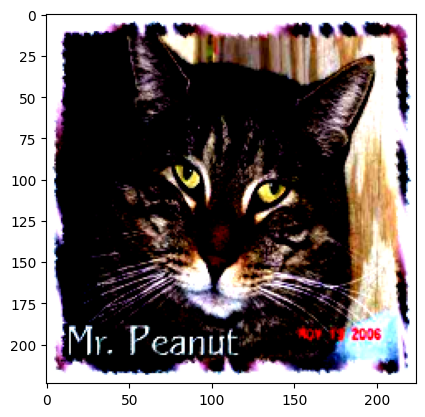

In [23]:
import os
import matplotlib.pyplot as plt
folder = os.path.join(os.getcwd(), 'datasets', 'cat_and_dog_images')
train_folder = os.path.join(folder, 'training_set')
test_folder = os.path.join(folder, 'test_set')
data = CatsDogs(train_folder, transform=transform)
img, label = data[200]
plt.imshow(img.permute(1, 2, 0).cpu())

In [7]:
train_folder

'/Users/rajmani/Documents/research/Home/python/computer-vision/datasets/cat_and_dog_images/training_set'

In [12]:
img

tensor([[[-0.1291,  0.3462,  0.4048,  ...,  0.2500,  0.1862,  0.1243],
         [-0.1454,  0.3299,  0.3964,  ...,  0.2846,  0.2268,  0.2070],
         [-0.1778,  0.2812,  0.3983,  ...,  0.3494,  0.3230,  0.3107],
         ...,
         [ 0.1941,  0.2731,  0.3397,  ...,  0.9929,  0.9708,  0.9470],
         [ 0.2107,  0.2815,  0.3385,  ...,  1.0484,  1.0683,  1.2479],
         [ 0.2270,  0.2979,  0.3138,  ...,  0.9890,  0.8464,  0.9587]],

        [[-0.9938, -0.5863, -0.6826,  ...,  0.4290,  0.3374,  0.2619],
         [-1.0105, -0.6030, -0.6594,  ...,  0.4604,  0.3788,  0.3120],
         [-1.0436, -0.6361, -0.6480,  ...,  0.4879,  0.4371,  0.3901],
         ...,
         [-1.3878, -1.3432, -1.3397,  ...,  0.0128, -0.0532, -0.1319],
         [-1.3708, -1.3346, -1.3409,  ...,  0.0369,  0.0122,  0.1422],
         [-1.3542, -1.3179, -1.3662,  ..., -0.0319, -0.2561, -0.1805]],

        [[-1.1975, -0.7888, -0.8493,  ...,  0.2084,  0.2780,  0.2871],
         [-1.2141, -0.8054, -0.8367,  ...,  0